# Cleaning Data

## 1. Data Types

In [90]:
import pandas as pd

run_times = pd.read_excel('../Data/Run Times.xlsx')
run_times

,Name,Run Time,Warm Up Time,Location,Run Date,Race Date,Rain,Fee
0,Alexis,9.2343,3.5,“school”,2023-04-15 12:00:00,2023-06-01,False,$0.00
1,Alexis,10.3842,3.5,School,2023-04-22 12:30:00,2023-06-01,True,$0.00
2,Alexis,8.1209,3 min,“the gym”,2023-05-10 15:00:00,2023-06-01,False,$2.50
3,David,7.2123,2.2,“school”,2023-05-01 15:15:00,2023-06-15,False,$0.00
4,David,6.8342,2,“gym”,2023-05-10 16:30:00,2023-06-15,False,$2.50


In [2]:
run_times.dtypes

Name                    object
Run Time               float64
Warm Up Time            object
Location                object
Run Date        datetime64[ns]
Race Date       datetime64[ns]
Rain                      bool
Fee                     object
dtype: object

In [3]:
run_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          5 non-null      object        
 1   Run Time      5 non-null      float64       
 2   Warm Up Time  5 non-null      object        
 3   Location      5 non-null      object        
 4   Run Date      5 non-null      datetime64[ns]
 5   Race Date     5 non-null      datetime64[ns]
 6   Rain          5 non-null      bool          
 7   Fee           5 non-null      object        
dtypes: bool(1), datetime64[ns](2), float64(1), object(4)
memory usage: 417.0+ bytes


In [87]:
run_times["Location"].str.replace('[“”]', '')
run_times["Location"]=run_times["Location"].str.replace('the', '')
run_times["Location"]=run_times["Location"].upper()

In [91]:
run_times["Fee"]=run_times["Fee"].str.replace("$",'')


,Name,Run Time,Warm Up Time,Location,Run Date,Race Date,Rain,Fee
0,Alexis,9.2343,3.5,“school”,2023-04-15 12:00:00,2023-06-01,False,$0.00
1,Alexis,10.3842,3.5,School,2023-04-22 12:30:00,2023-06-01,True,$0.00
2,Alexis,8.1209,3 min,“the gym”,2023-05-10 15:00:00,2023-06-01,False,$2.50
3,David,7.2123,2.2,“school”,2023-05-01 15:15:00,2023-06-15,False,$0.00
4,David,6.8342,2,“gym”,2023-05-10 16:30:00,2023-06-15,False,$2.50


In [93]:
# change Fee from object to numeric
run_times["Fee"]=pd.to_numeric(run_times["Fee"].str.replace('$',''))

/var/folders/sy/lfmt7xdx3zj5qzj0mw834nzw0000gn/T/ipykernel_90217/1601631487.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  run_times["Fee"]=pd.to_numeric(run_times["Fee"].str.replace('$',''))


In [96]:
run_times#.dtypes

,Name,Run Time,Warm Up Time,Location,Run Date,Race Date,Rain,Fee
0,Alexis,9.2343,3.5,“school”,2023-04-15 12:00:00,2023-06-01,False,0.0
1,Alexis,10.3842,3.5,School,2023-04-22 12:30:00,2023-06-01,True,0.0
2,Alexis,8.1209,3 min,“the gym”,2023-05-10 15:00:00,2023-06-01,False,2.5
3,David,7.2123,2.2,“school”,2023-05-01 15:15:00,2023-06-15,False,0.0
4,David,6.8342,2,“gym”,2023-05-10 16:30:00,2023-06-15,False,2.5


In [97]:
# change Warm Up Time from object to numeric
pd.to_numeric(run_times["Warm Up Time"],errors="coerce")

0    3.5
1    3.5
2    NaN
3    2.2
4    2.0
Name: Warm Up Time, dtype: float64

In [7]:
# remove the min from the Warm Up Time (google: str.replace nan)
run_times['Warm Up Time'].str.replace(' min', '')

0    NaN
1    NaN
2      3
3    NaN
4    NaN
Name: Warm Up Time, dtype: object

In [8]:
# remove the min from the Warm Up Time
run_times['Warm Up Time'].astype('str').str.replace(' min', '')

0    3.5
1    3.5
2      3
3    2.2
4      2
Name: Warm Up Time, dtype: object

In [99]:
# change the Rain column from boolean to int
run_times["Rain"].astype('int')

0    0
1    1
2    0
3    0
4    0
Name: Rain, dtype: int64

## 2. Missing Data

In [191]:
import pandas as pd

df = pd.read_excel('../Data/Student Grades.xlsx')
df1 = pd.read_excel('../Data/Student Grades.xlsx')

In [192]:
df.shape

(86, 4)

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Student  84 non-null     object 
 1   Class    83 non-null     object 
 2   Year     80 non-null     object 
 3   Grade    82 non-null     float64
dtypes: float64(1), object(3)
memory usage: 2.8+ KB


In [194]:
df["Year"].nunique()

4

In [195]:
df["Year"].unique()

array(['Freshman', nan, 'Sophomore', 'Junior', 'Senior'], dtype=object)

In [196]:
df.isnull().sum()

Student    2
Class      3
Year       6
Grade      4
dtype: int64

In [197]:
df[df.isna().any(axis=1)]

,Student,Class,Year,Grade
7,Jacob,Freshman Seminar,NaN,88.0
8,William,Freshman Seminar,NaN,89.0
9,Ethan,Freshman Seminar,NaN,86.0
62,Landon,Exploratory Data Analysis,Junior,NaN
81,NaN,NaN,NaN,NaN
82,Bennett,NaN,NaN,NaN
83,NaN,EDA,Junior,84.0
84,Gavin,EDA,Senior,NaN
85,Calvin,NaN,NaN,100.0


In [198]:
df.describe()

,Grade
count,82.000000
mean,85.707317
std,15.527346
min,45.000000
25%,81.000000
50%,85.000000
75%,90.000000
max,200.000000


In [199]:
df["Class"].value_counts()

Intro to Python              25
Intro to SQL                 20
EDA                          13
Freshman Seminar             12
Exploratory Data Analysis    12
Python                        1
Name: Class, dtype: int64

In [200]:
df[df["Student"]=="Bennett"]

,Student,Class,Year,Grade
82,Bennett,NaN,NaN,NaN


### a. Find missing data

In [201]:
# Missing data representations in Python
import numpy as np

np.NaN
pd.NA
None

In [202]:
# Quickly explore the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Student  84 non-null     object 
 1   Class    83 non-null     object 
 2   Year     80 non-null     object 
 3   Grade    82 non-null     float64
dtypes: float64(1), object(3)
memory usage: 2.8+ KB


In [203]:
# Take a look at the unique values (including NaN) in the Year column
df["Year"].value_counts(dropna=False)

Freshman     35
Sophomore    24
Junior       20
NaN           6
Senior        1
Name: Year, dtype: int64

In [204]:
# All cells that have a NaN value
df.isna()

,Student,Class,Year,Grade
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
81,True,True,True,True
82,False,True,True,True
83,True,False,False,False
84,False,False,False,True


In [205]:
# Return the number of NaNs in each column
df.isna().sum()

Student    2
Class      3
Year       6
Grade      4
dtype: int64

In [206]:
# Rows with any NaNs
df[df.isna().any(axis=1)]

,Student,Class,Year,Grade
7,Jacob,Freshman Seminar,NaN,88.0
8,William,Freshman Seminar,NaN,89.0
9,Ethan,Freshman Seminar,NaN,86.0
62,Landon,Exploratory Data Analysis,Junior,NaN
81,NaN,NaN,NaN,NaN
82,Bennett,NaN,NaN,NaN
83,NaN,EDA,Junior,84.0
84,Gavin,EDA,Senior,NaN
85,Calvin,NaN,NaN,100.0


### b. Handle missing data

In [207]:
# 
df[df.isna().any(axis=1)].dropna()

,Student,Class,Year,Grade


In [208]:
#df.isnull().sum()

In [209]:
#Drop rows that don't have a student or class name
df[df.isna().any(axis=1)].dropna(subset=['Student', 'Class'])

,Student,Class,Year,Grade
7,Jacob,Freshman Seminar,NaN,88.0
8,William,Freshman Seminar,NaN,89.0
9,Ethan,Freshman Seminar,NaN,86.0
62,Landon,Exploratory Data Analysis,Junior,NaN
84,Gavin,EDA,Senior,NaN


In [210]:
df.isna().sum()

Student    2
Class      3
Year       6
Grade      4
dtype: int64

In [124]:
#df[df.isna().any(axis=1)][~(df['Student'].isna()) | ~(df['Class'].isna())]#.isna().any(axis=1)
#df[~(df['Student'].isna() & df['Class'].isna())]

In [211]:
df.dropna(subset=['Student', 'Class'], inplace=True)
#df.isnull().sum()

In [212]:
# Check the rows with missing grades
df[df["Grade"].isna()]

,Student,Class,Year,Grade
62,Landon,Exploratory Data Analysis,Junior,NaN
84,Gavin,EDA,Senior,NaN


In [213]:
# Impute the NaN grades
df["Grade"].fillna(df["Grade"].mean(), inplace=True)
df.isnull().sum()

Student    0
Class      0
Year       3
Grade      0
dtype: int64

In [214]:
# Check the rows with NaNs
df[df.isna().any(axis=1)]

,Student,Class,Year,Grade
7,Jacob,Freshman Seminar,NaN,88.0
8,William,Freshman Seminar,NaN,89.0
9,Ethan,Freshman Seminar,NaN,86.0


In [35]:
# Look at all Freshman Seminar students
df[df['Class'] == 'Freshman Seminar']

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0
5,Mason,Freshman Seminar,Freshman,90.0
6,Isabella,Freshman Seminar,Freshman,90.0
7,Jacob,Freshman Seminar,NaN,88.0
8,William,Freshman Seminar,NaN,89.0
9,Ethan,Freshman Seminar,NaN,86.0


In [36]:
# Update a specific value
df.loc[7, 'Year'] = 'Freshman'

In [37]:
df.loc[7]

Student               Jacob
Class      Freshman Seminar
Year               Freshman
Grade                  88.0
Name: 7, dtype: object

In [215]:
# Update multiple values using np.where
df["Year"]=np.where((df["Year"].isna()) & (df["Class"]=="Freshman Seminar"), 'Freshman', df['Year'])
df

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.00
1,Olivia,Freshman Seminar,Freshman,86.00
2,Noah,Freshman Seminar,Freshman,86.00
3,Sophia,Freshman Seminar,Freshman,87.00
4,Liam,Freshman Seminar,Freshman,90.00
...,...,...,...,...
77,Aaron,EDA,Junior,85.00
78,Charles,EDA,Junior,93.00
79,Connor,EDA,Junior,91.00
80,Riley,EDA,Junior,87.00


In [160]:
df["Year"]=np.where((df["Year"].isna()) & (df["Class"]=="Freshman Seminar"),"Freshman",df["Year"]
)

In [161]:
df.isnull().sum()

Student    0
Class      0
Year       0
Grade      0
dtype: int64

In [125]:

import numpy as np

df["Year"] = np.where((df["Year"].isna()) & (df["Class"]=="Freshman Seminar"), 'Freshman', df['Year'])
df

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0
...,...,...,...,...
81,NaN,NaN,NaN,NaN
82,Bennett,NaN,NaN,NaN
83,NaN,EDA,Junior,84.0
84,Gavin,EDA,Senior,NaN


In [26]:
# Check the rows with NaNs
df[df.isna().any(axis=1)]

,Student,Class,Year,Grade


## 3. Inconsistent Text and Typos

### a. Find inconsistent text and typos

In [216]:
# Find inconsistencies in categorical columns
df["Class"].value_counts()

Intro to Python              25
Intro to SQL                 20
Freshman Seminar             12
Exploratory Data Analysis    12
EDA                          12
Python                        1
Name: Class, dtype: int64

In [217]:
# Look at Exploratory Data Analysis students vs EDA students
df[df["Class"].isin(['Exploratory Data Analysis', 'EDA'])]

,Student,Class,Year,Grade
58,Evelyn,Exploratory Data Analysis,Sophomore,89.00
59,Jack,Exploratory Data Analysis,Sophomore,84.00
60,Ella,Exploratory Data Analysis,Sophomore,200.00
61,Chloe,Exploratory Data Analysis,Sophomore,87.00
62,Landon,Exploratory Data Analysis,Junior,85.55
63,Christian,Exploratory Data Analysis,Junior,77.00
64,Jordan,Exploratory Data Analysis,Junior,83.00
65,Jonathan,Exploratory Data Analysis,Junior,82.00
66,Levi,Exploratory Data Analysis,Junior,91.00
67,Victoria,Exploratory Data Analysis,Junior,90.00


In [40]:
# Look at Intro to Python students vs Python students
df[df["Class"].isin(['Intro to Python', 'Python'])]

,Student,Class,Year,Grade
12,Alexander,Intro to Python,Freshman,85.0
13,Logan,Intro to Python,Freshman,85.0
14,James,Intro to Python,Freshman,82.0
15,Daniel,Intro to Python,Freshman,85.0
16,Elijah,Intro to Python,Freshman,85.0
17,Benjamin,Intro to Python,Freshman,81.0
18,Mia,Intro to Python,Freshman,80.0
19,Mia,Python,Freshman,80.0
20,Jayden,Intro to Python,Freshman,82.0
21,Aiden,Intro to Python,Freshman,86.0


In [30]:
# Find inconsistencies in categorical columns
df["Year"].value_counts()

Freshman     38
Sophomore    24
Junior       19
Senior        1
Name: Year, dtype: int64

In [31]:
# Find inconsistencies in numerical columns
df.describe()

,Grade
count,82.000000
mean,85.550000
std,15.443965
min,45.000000
25%,81.000000
50%,85.275000
75%,89.750000
max,200.000000


### b. Handle inconsistent text and typos

In [32]:
# Remember our DataFrame
df.head()

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0


In [164]:
# Check the unique class values
df["Class"].value_counts()

Intro to Python              25
Intro to SQL                 20
Freshman Seminar             12
Exploratory Data Analysis    12
EDA                          12
Python                        1
Name: Class, dtype: int64

In [218]:
# Replace EDA with Exploratory Data Analysis
df['Class'] = np.where(df['Class'] == 'EDA', 'Exploratory Data Analysis', df.Class)
df['Class'].value_counts()

Intro to Python              25
Exploratory Data Analysis    24
Intro to SQL                 20
Freshman Seminar             12
Python                        1
Name: Class, dtype: int64

In [219]:
# Replace Python with Intro to Python
df.Class = np.where(df['Class'] == 'Python', 'Intro to Python', df.Class)
df.Class.value_counts()

Intro to Python              26
Exploratory Data Analysis    24
Intro to SQL                 20
Freshman Seminar             12
Name: Class, dtype: int64

In [36]:
# Find grades over 100
df[df.Grade > 100]

,Student,Class,Year,Grade
60,Ella,Exploratory Data Analysis,Sophomore,200.0


In [37]:
# Replace the 200 value with 100
df.Grade = np.where(df.Grade > 100, 100, df.Grade)
df.Grade.describe()

count     82.000000
mean      84.330488
std        8.824663
min       45.000000
25%       81.000000
50%       85.275000
75%       89.750000
max      100.000000
Name: Grade, dtype: float64

## 4. Duplicate Rows

### a. Find duplicate rows

In [165]:
# Remember our DataFrame
df.head()

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0


In [39]:
# Find the duplicate values
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
77    False
78    False
79    False
80    False
84    False
Length: 82, dtype: bool

In [175]:
df[df["Student"]=="Isaac"]

,Student,Class,Year,Grade
42,Isaac,Intro to SQL,Sophomore,96.0


In [170]:
df[df.duplicated()]

,Student,Class,Year,Grade
43,Isaac,Intro to SQL,Sophomore,96.0
44,Isaac,Intro to SQL,Sophomore,96.0


In [174]:
# View the duplicate rows
df[df.duplicated(keep=False)]

,Student,Class,Year,Grade


In [173]:
df.drop_duplicates(inplace=True)

In [41]:
# View all the duplicates
df[df.duplicated(keep=False)]

,Student,Class,Year,Grade
18,Mia,Intro to Python,Freshman,80.0
19,Mia,Intro to Python,Freshman,80.0
42,Isaac,Intro to SQL,Sophomore,96.0
43,Isaac,Intro to SQL,Sophomore,96.0
44,Isaac,Intro to SQL,Sophomore,96.0


### b. Handle duplicate rows

In [42]:
# Remove the duplicate values
df.drop_duplicates()

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.00
1,Olivia,Freshman Seminar,Freshman,86.00
2,Noah,Freshman Seminar,Freshman,86.00
3,Sophia,Freshman Seminar,Freshman,87.00
4,Liam,Freshman Seminar,Freshman,90.00
...,...,...,...,...
77,Aaron,Exploratory Data Analysis,Junior,85.00
78,Charles,Exploratory Data Analysis,Junior,93.00
79,Connor,Exploratory Data Analysis,Junior,91.00
80,Riley,Exploratory Data Analysis,Junior,87.00


In [43]:
# Save the results
df.drop_duplicates(inplace=True)
df

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.00
1,Olivia,Freshman Seminar,Freshman,86.00
2,Noah,Freshman Seminar,Freshman,86.00
3,Sophia,Freshman Seminar,Freshman,87.00
4,Liam,Freshman Seminar,Freshman,90.00
...,...,...,...,...
77,Aaron,Exploratory Data Analysis,Junior,85.00
78,Charles,Exploratory Data Analysis,Junior,93.00
79,Connor,Exploratory Data Analysis,Junior,91.00
80,Riley,Exploratory Data Analysis,Junior,87.00


In [241]:
df1.describe()

,Grade
count,82.000000
mean,85.707317
std,15.527346
min,45.000000
25%,81.000000
50%,85.000000
75%,90.000000
max,200.000000


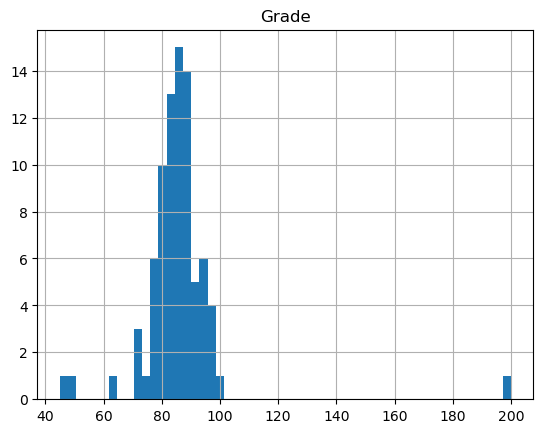

In [245]:
df1.hist(bins=55);

In [248]:
df1[df1["Grade"]<=100]

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0
...,...,...,...,...
78,Charles,EDA,Junior,93.0
79,Connor,EDA,Junior,91.0
80,Riley,EDA,Junior,87.0
83,NaN,EDA,Junior,84.0


## 5. Outliers

### a. Find outliers

#### i. Histograms

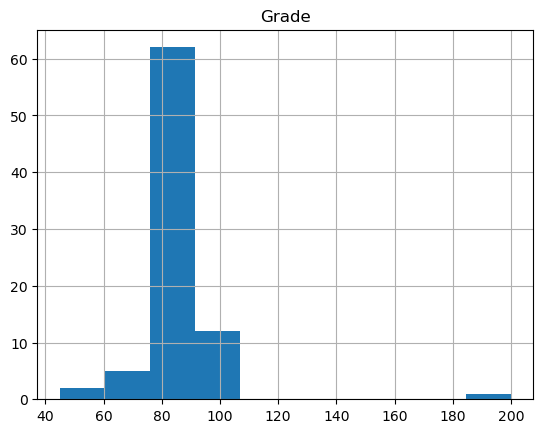

In [220]:
# basic histogram 
df.hist();

In [249]:
df['Grade'] = np.where(df["Grade"] > 100, 100, df["Grade"])#it will replace 200
#df['Grade'].describe()
df1[df1["Grade"]<=100]###this one will drop the 200 outlier
df.describe()

,Grade
count,82.000000
mean,84.330488
std,8.824663
min,45.000000
25%,81.000000
50%,85.275000
75%,89.750000
max,100.000000


In [226]:
# difference between min and max grades
df.Grade.max() - df.Grade.min()

55.0

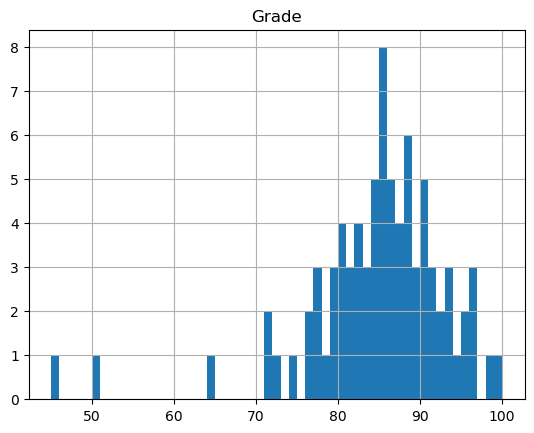

In [227]:
# change the bin size to show each grade individually
df.hist(bins=55);

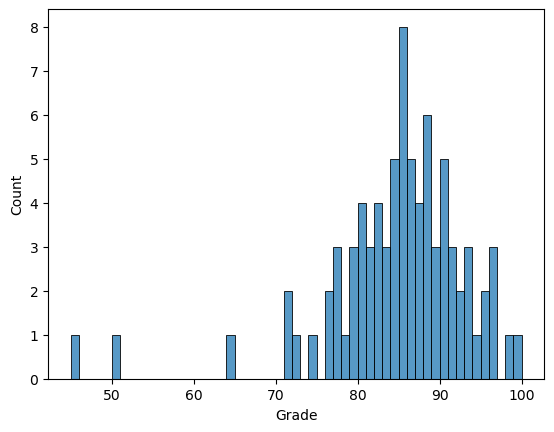

In [251]:
# histogram using seaborn
import seaborn as sns

# sns.histplot(df);
# specify that each bin should only include 1 grade
sns.histplot(df['Grade'], binwidth=1);

In [229]:
# look specifically at the grade column
#sns.histplot(df.Grade);

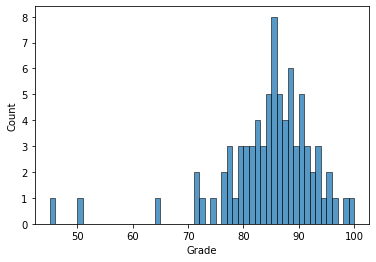

In [49]:
# specify that each bin should only include 1 grade
sns.histplot(df.Grade, binwidth=1);

#### ii. Box plots

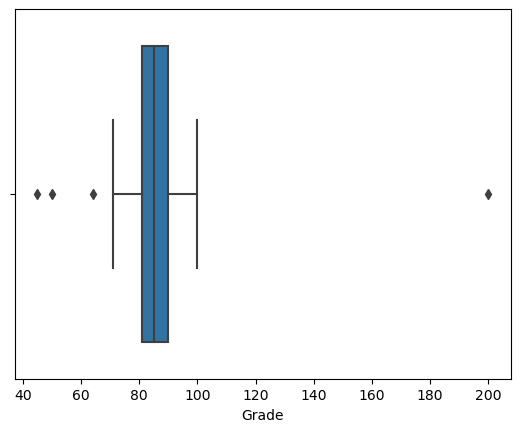

In [253]:
# box plot
#sns.histplot(df['Grade']);
sns.boxplot(x=df1["Grade"]);


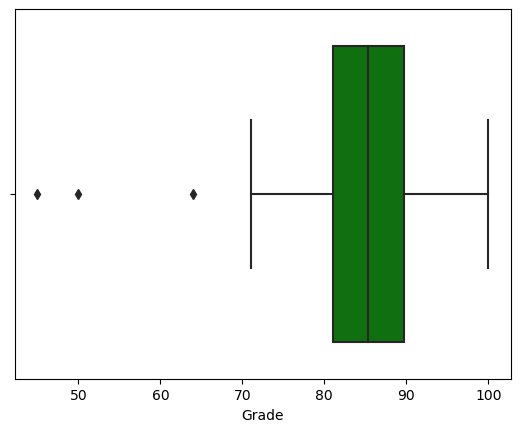

In [231]:
# box plot
sns.boxplot(x=df["Grade"], color='green');

In [259]:
q25
q75

89.75

In [254]:
# identify the box plot outliers
import numpy as np

# calculate the quartiles
q25, q50, q75 = np.percentile(df['Grade'], [25, 50, 75])
iqr = q75 - q25

# calculate the min and max
min_grade = q25 - 1.5*iqr
max_grade = q75 + 1.5*iqr

# show calculations
min_grade, q25, q50, q75, max_grade

(67.875, 81.0, 85.275, 89.75, 102.875)

In [233]:
df.dropna(subset="Grade",inplace=True)

In [234]:
# identify the box plot outliers
import numpy as np

# calculate the quartiles
q25, q50, q75 = np.percentile(df["Grade"], [25, 50, 75])
iqr = q75 - q25

# calculate the min and max
min_grade = q25 - 1.5*iqr
max_grade = q75 + 1.5*iqr

# show calculations
min_grade, q25, q50, q75, max_grade

(67.875, 81.0, 85.275, 89.75, 102.875)

In [235]:
# identify the outliers
df[df.Grade < 69]

,Student,Class,Year,Grade
37,John,Intro to Python,Freshman,50.0
56,Wyatt,Intro to SQL,Sophomore,45.0
69,Jaxon,Exploratory Data Analysis,Junior,64.0


#### iii. Standard deviation

In [236]:
import numpy as np

# calculate the mean and standard deviation
mean = np.mean(df['Grade'])
sd = np.std(df['Grade'])

# show mean and standard deviation
mean, sd

(84.33048780487805, 8.770688976807925)

In [237]:
# identify points that are more than 3 standard deviations away
[grade for grade in df['Grade'] if (grade < mean - 3*sd) or 
 (grade > mean + 3*sd)]

[50.0, 45.0]

In [56]:
# identify points that are more than 2 standard deviations away
[grade for grade in df.Grade if (grade < mean - 2*sd) or (grade > mean + 2*sd)]

[50.0, 45.0, 64.0]

In [57]:
# identify points that are more than 4 standard deviations away
[grade for grade in df.Grade if (grade < mean - 4*sd) or (grade > mean + 4*sd)]

[45.0]

In [58]:
# view all ordered grades
df.Grade.sort_values()

56     45.0
37     50.0
69     64.0
36     71.0
40     71.0
      ...  
70     95.0
33     95.0
42     96.0
52     98.0
60    100.0
Name: Grade, Length: 79, dtype: float64

### b. Handle Outliers

#### i. Remove an entire row or column

In [59]:
# these are the two rows with outliers
df[df.Grade < 60]

,Student,Class,Year,Grade
37,John,Intro to Python,Freshman,50.0
56,Wyatt,Intro to SQL,Sophomore,45.0


In [60]:
# option 1: drop the two rows with outliers
df.drop([36, 53])

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.00
1,Olivia,Freshman Seminar,Freshman,86.00
2,Noah,Freshman Seminar,Freshman,86.00
3,Sophia,Freshman Seminar,Freshman,87.00
4,Liam,Freshman Seminar,Freshman,90.00
...,...,...,...,...
77,Aaron,Exploratory Data Analysis,Junior,85.00
78,Charles,Exploratory Data Analysis,Junior,93.00
79,Connor,Exploratory Data Analysis,Junior,91.00
80,Riley,Exploratory Data Analysis,Junior,87.00


In [61]:
# option 2: this is the opposite of the result above
df[df.Grade >= 60]

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.00
1,Olivia,Freshman Seminar,Freshman,86.00
2,Noah,Freshman Seminar,Freshman,86.00
3,Sophia,Freshman Seminar,Freshman,87.00
4,Liam,Freshman Seminar,Freshman,90.00
...,...,...,...,...
77,Aaron,Exploratory Data Analysis,Junior,85.00
78,Charles,Exploratory Data Analysis,Junior,93.00
79,Connor,Exploratory Data Analysis,Junior,91.00
80,Riley,Exploratory Data Analysis,Junior,87.00


#### ii. Impute the data

In [62]:
# identify the outliers
df.Grade < 60

0     False
1     False
2     False
3     False
4     False
      ...  
77    False
78    False
79    False
80    False
84    False
Name: Grade, Length: 79, dtype: bool

In [63]:
# locate the outliers
df[df.Grade < 60]

,Student,Class,Year,Grade
37,John,Intro to Python,Freshman,50.0
56,Wyatt,Intro to SQL,Sophomore,45.0


In [64]:
# minimum of the non-outliers
min_grade = df[df.Grade > 60].Grade.min()
min_grade

64.0

In [65]:
# update the outlier values with the minimum grade
df.Grade = np.where(df.Grade < 60, min_grade, df.Grade)
df.Grade

0     86.00
1     86.00
2     86.00
3     87.00
4     90.00
      ...  
77    85.00
78    93.00
79    91.00
80    87.00
84    85.55
Name: Grade, Length: 79, dtype: float64

In [66]:
# confirm the updated values
df.loc[[37, 56]]

,Student,Class,Year,Grade
37,John,Intro to Python,Freshman,64.0
56,Wyatt,Intro to SQL,Sophomore,64.0


#### iii. Resolve outliers based on domain expertise

In [67]:
# see John's information
df[df.Student == 'John']

,Student,Class,Year,Grade
37,John,Intro to Python,Freshman,64.0


In [68]:
# his last test wasn't logged and he should have an 74
df.loc[37, 'Grade'] = 74

In [69]:
# confirm the updated value
df[df.Student == 'John']

,Student,Class,Year,Grade
37,John,Intro to Python,Freshman,74.0


### c. Review Clean Data

In [70]:
# no more missing data
df[df.isna().any(axis=1)]

,Student,Class,Year,Grade


In [71]:
# no more inconsistent categorical data
df.Class.value_counts()

Intro to Python              25
Exploratory Data Analysis    24
Intro to SQL                 18
Freshman Seminar             12
Name: Class, dtype: int64

In [72]:
# no more inconsistent numeric data
df.describe()

,Grade
count,79.000000
mean,84.634177
std,6.983527
min,64.000000
25%,81.000000
50%,85.000000
75%,89.000000
max,100.000000


In [73]:
# no more duplicate data
df[df.duplicated()]

,Student,Class,Year,Grade


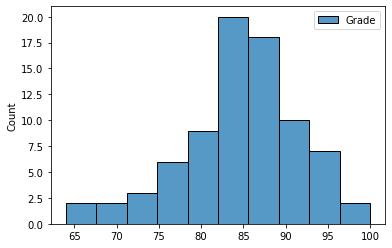

In [74]:
# no more outliers
sns.histplot(df);

## 6. Create New Columns From Numeric Columns

In [261]:
# read in the data
groceries = pd.read_excel('../Data/Groceries.xlsx')
groceries.head()
groceries[groceries["Inventory"]<=50]

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15
8,P100018,Produce: Vegetable,Celery,1.99,50,2023-06-12 16:42:00,2023-06-15
15,P100025,Produce: Dairy,Milk (Soy),4.49,32,2023-06-13 08:37:00,2023-06-17
17,P100027,Pantry: Snacks,Apple Sauce - organic,1.50,27,2023-06-10 12:02:00,2023-06-24
20,P100030,Pantry: Snacks,Raisins,2.99,5,2023-06-10 12:38:00,2023-06-24


In [263]:
groceries['InventoryCheck'] = np.where(groceries['Inventory'] < 50, 'Low Inventory', 'No Need to order')
groceries["InventoryCheck"].value_counts()

No Need to order    22
Low Inventory        3
Name: InventoryCheck, dtype: int64

### a. basic math calculations

In [268]:
# increase price, round to two decimal places and save as a new column
groceries['New Price'] = round(groceries['Price_Dollars'] * 1.05, 2)

groceries['Product_ID_Num'] = groceries["Product_ID"].str[1:]

groceries['InventoryCheck'] = np.where(groceries['Inventory'] < 50, 
                                       'Low Inventory', 'No Need to order')


### b. Calculate percent of inventory

In [52]:
# total inventory
groceries["Total Inventory"] = groceries.Inventory.sum()
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column,Total Inventory
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857


In [53]:
# percent of inventory
groceries["Percent Inventory"] = round(groceries.Inventory / groceries['Total Inventory'] * 100, 1)
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column,Total Inventory,Percent Inventory
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857,7.2
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857,10.3
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857,4.1
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857,1.0
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.0


### c. Flag low inventory items

In [54]:
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column,Total Inventory,Percent Inventory
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857,7.2
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857,10.3
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857,4.1
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857,1.0
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.0


In [55]:
# create a column that flags low inventory
import numpy as np

groceries['Low Inventory'] = np.where(groceries.Inventory < 50, 'Low Inventory', '')
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column,Total Inventory,Percent Inventory,Low Inventory
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857,7.2,
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857,10.3,
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857,4.1,
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857,1.0,
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.0,


## 7. Create New Columns From DateTime Columns

In [56]:
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column,Total Inventory,Percent Inventory,Low Inventory
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857,7.2,
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857,10.3,
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857,4.1,
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857,1.0,
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.0,


In [274]:
# extract the time
groceries['Last_Updated_Time'] = groceries['Last_Updated'].dt.month
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,InventoryCheck,New Price,Product_ID_Num,Last_Updated_Time
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,No Need to order,1.58,100010,6
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,No Need to order,0.42,100011,6
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,No Need to order,4.20,100012,6
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,No Need to order,1.04,100013,6
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,No Need to order,4.19,100014,6


In [83]:
# extract the day of the week
groceries['Shipment_Date_DOW'] = groceries.Next_Scheduled_Shipment.dt.dayofweek
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column,Total Inventory,Percent Inventory,Low Inventory,Last_Updated_Time,Shipment_Date_DOW
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857,7.2,,15:35:00,3
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857,10.3,,18:30:00,3
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857,4.1,,17:22:00,3
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857,1.0,,16:29:00,3
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.0,,18:10:00,3


In [84]:
# day of week mapping
dow_mapping = {0: 'Monday',
               1: 'Tuesday',
               2: 'Wednesday',
               3: 'Thursday',
               4: 'Friday',
               5: 'Saturday',
               6: 'Sunday'}

groceries['Shipment_Date_DOW'] = groceries['Shipment_Date_DOW'].map(dow_mapping)
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column,Total Inventory,Percent Inventory,Low Inventory,Last_Updated_Time,Shipment_Date_DOW
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857,7.2,,15:35:00,Thursday
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857,10.3,,18:30:00,Thursday
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857,4.1,,17:22:00,Thursday
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857,1.0,,16:29:00,Thursday
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.0,,18:10:00,Thursday


In [85]:
# add 1 day to shipment date
groceries.Next_Scheduled_Shipment + pd.to_timedelta(1, 'D')

0    2023-06-16
1    2023-06-16
2    2023-06-16
3    2023-06-16
4    2023-06-16
5    2023-06-16
6    2023-06-16
7    2023-06-16
8    2023-06-16
9    2023-06-16
10   2023-06-18
11   2023-06-18
12   2023-06-18
13   2023-06-18
14   2023-06-18
15   2023-06-18
16   2023-06-18
17   2023-06-25
18   2023-06-25
19   2023-06-25
20   2023-06-25
21   2023-06-29
22   2023-06-29
23   2023-06-29
24   2023-06-29
Name: Next_Scheduled_Shipment, dtype: datetime64[ns]

In [58]:
# # only add 1 day to fruit delivery
# groceries['New_Shipment_Date'] = np.where(groceries.Category == 'Produce: Fruit',
#          groceries.Next_Scheduled_Shipment + pd.to_timedelta(1, 'D'),
#          groceries.Next_Scheduled_Shipment)
# groceries.head()

## 8. Create New Columns From Text Columns

In [59]:
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column,Total Inventory,Percent Inventory,Low Inventory,Last_Updated_Time
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857,7.2,,15:35:00
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857,10.3,,18:30:00
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857,4.1,,17:22:00
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857,1.0,,16:29:00
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.0,,18:10:00


In [88]:
# remove the first character
groceries['Product_ID_Num'] = groceries.Product_ID.str[1:]
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column,Total Inventory,Percent Inventory,Low Inventory,Last_Updated_Time,Shipment_Date_DOW,New_Shipment_Date,Product_ID_Num
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857,7.2,,15:35:00,Thursday,2023-06-16,100010
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857,10.3,,18:30:00,Thursday,2023-06-16,100011
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857,4.1,,17:22:00,Thursday,2023-06-16,100012
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857,1.0,,16:29:00,Thursday,2023-06-16,100013
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.0,,18:10:00,Thursday,2023-06-16,100014


In [89]:
# check the data types
groceries.dtypes

Product_ID                         object
Category                           object
Item                               object
Price_Dollars                     float64
Inventory                           int64
Last_Updated               datetime64[ns]
Next_Scheduled_Shipment    datetime64[ns]
New Column                        float64
Total Inventory                     int64
Percent Inventory                 float64
Low Inventory                      object
Last_Updated_Time                  object
Shipment_Date_DOW                  object
New_Shipment_Date          datetime64[ns]
Product_ID_Num                     object
dtype: object

In [90]:
# convert the data type from an obejct to an int
groceries.Product_ID_Num = groceries.Product_ID_Num.astype('int')

In [91]:
# split category
groceries[['Category', 'Subcategory']] = pd.DataFrame(groceries.Category.str.split(':').to_list())
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column,Total Inventory,Percent Inventory,Low Inventory,Last_Updated_Time,Shipment_Date_DOW,New_Shipment_Date,Product_ID_Num,Subcategory
0,P100010,Produce,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857,7.2,,15:35:00,Thursday,2023-06-16,100010,Fruit
1,P100011,Produce,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857,10.3,,18:30:00,Thursday,2023-06-16,100011,Fruit
2,P100012,Produce,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857,4.1,,17:22:00,Thursday,2023-06-16,100012,Fruit
3,P100013,Produce,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857,1.0,,16:29:00,Thursday,2023-06-16,100013,Fruit
4,P100014,Produce,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.0,,18:10:00,Thursday,2023-06-16,100014,Fruit


In [92]:
# find a term within the items column
groceries['Organic'] = groceries.Item.str.lower().str.contains('organic')
groceries[groceries.Item.str.lower().str.contains('organic')]

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column,Total Inventory,Percent Inventory,Low Inventory,Last_Updated_Time,Shipment_Date_DOW,New_Shipment_Date,Product_ID_Num,Subcategory,Organic
4,P100014,Produce,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.0,,18:10:00,Thursday,2023-06-16,100014,Fruit,True
11,P100021,Produce,Chicken (Organic),10.49,284,2023-06-13 07:20:00,2023-06-17,11.01,4857,5.8,,07:20:00,Saturday,2023-06-17,100021,Meat,True
17,P100027,Pantry,Apple Sauce - organic,1.50,27,2023-06-10 12:02:00,2023-06-24,1.58,4857,0.6,Low Inventory,12:02:00,Saturday,2023-06-24,100027,Snacks,True


In [93]:
# reorder columns
groceries[['Product_ID', 'Product_ID_Num', 'Category', 'Subcategory',
           'Item', 'Organic', 'Price_Dollars',
           'Inventory', 'Percent Inventory', 'Low Inventory',
           'Last_Updated', 'Last_Updated_Time',
           'Next_Scheduled_Shipment', 'Shipment_Date_DOW']].head()

,Product_ID,Product_ID_Num,Category,Subcategory,Item,Organic,Price_Dollars,Inventory,Percent Inventory,Low Inventory,Last_Updated,Last_Updated_Time,Next_Scheduled_Shipment,Shipment_Date_DOW
0,P100010,100010,Produce,Fruit,Apple,False,1.50,349,7.2,,2023-06-12 15:35:00,15:35:00,2023-06-15,Thursday
1,P100011,100011,Produce,Fruit,Banana,False,0.40,500,10.3,,2023-06-12 18:30:00,18:30:00,2023-06-15,Thursday
2,P100012,100012,Produce,Fruit,Grapes,False,4.00,200,4.1,,2023-06-12 17:22:00,17:22:00,2023-06-15,Thursday
3,P100013,100013,Produce,Fruit,Grapefruit,False,0.99,50,1.0,,2023-06-12 16:29:00,16:29:00,2023-06-15,Thursday
4,P100014,100014,Produce,Fruit,Organic Strawberries,True,3.99,148,3.0,,2023-06-12 18:10:00,18:10:00,2023-06-15,Thursday


In [94]:
# save as new variable
groceries_with_new_columns = groceries[['Product_ID', 'Product_ID_Num', 'Category', 'Subcategory',
           'Item', 'Organic', 'Price_Dollars',
           'Inventory', 'Percent Inventory', 'Low Inventory',
           'Last_Updated', 'Last_Updated_Time',
           'Next_Scheduled_Shipment', 'Shipment_Date_DOW']]

In [95]:
# pickle it for later
groceries_with_new_columns.to_pickle('../Data/groceries_with_new_columns.pkl')